The goal here is to find the *W1, b1* constants from the linear model f(x) = *W1*\*x + *b1* 

The training data consists of 500 points sampled from: f(x) = 2\*x + 1 + random_normal\*0.1

For that it is necessary to:
1. nn = neuralnet(...) - define neural network architecture and create neural network
2. nn = init_cloud(N) - Initialize cloud with N particles
3. nn.train(...) - Define the training data, algorithm parameters and start the algorithm

In [4]:
from mlswarm import neuralnet 
from sklearn.model_selection import train_test_split
import numpy as np

#DATASET-------------------------------
N_points = 500
X = np.linspace(0, 2, N_points)
Y = 2 * X + 1 + np.random.randn(*X.shape) * 0.1  
X.resize((N_points,1))
Y.resize((N_points,1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
nn_architecture = [
    {"input_dim": 1, "output_dim": 1, "activation": "linear"}
]

#CREATE NEURAL NETWORK
nn = neuralnet(nn_architecture)

#INITIALIZE CLOUD WITH 5 PARTICLES ACCORDING TO XAVIER INITIALIZATION
nn.init_cloud(N = 5)

#TRAINING
nn.train(X_train, Y_train, {'max_epochs': 200,
                            'learning_rate': 0.1,
                            'kernel_a': 0.01,
                            'alpha_rate':1,
                            'alpha_init':0})


Training started...
Maximum amount of epochs reached

Cost function value at cloud mean: 0.010077958413801607
Best cost was: 0.009979922520331945
Cost function value (derivative) evaluated 1000 (0) times

The clock time (CPU time) for train_nn was 0.10984 (0.10938) seconds


Test set accuracy using neuralnet 0: 0.01110
Test set accuracy using best neuralnet: 0.01111


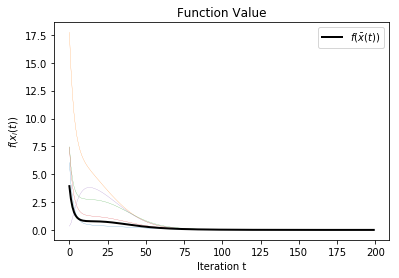

In [6]:
#ACCURACY ON TEST SET USING PARTICLE 0 WEIGHTS
nn.prediction_accuracy_particle(X_test, Y_test, acc_type = 'rmse', particle = 0)

#ACCURACY ON TEST SET USING CLOUD MEAN WEIGHTS
nn.prediction_accuracy_best_particle(X_test, Y_test, acc_type = 'rmse')

#PLOT COST HISTORY
nn.plot_cost_history()